In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [151]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [152]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [153]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [168]:
df1.groupby(['Embarked', 'Sex']).sum()

PassengerId  Survived  Pclass       Age  SibSp  Parch  \
Embarked Sex                                                             
C        female        31924        64     126   1729.00     40     36   
         male          42896        29     191   2276.92     25     25   
Q        female        13469        27     104    291.50      8      8   
         male          18709         3     120    495.00     25      5   
S        female        89058       140     446   5165.50    170    160   
         male         200438        77    1068  11147.25    198    106   

                      Fare  
Embarked Sex                
C        female  5487.3958  
         male    4584.9004  
Q        female   454.8585  
         male     567.3958  
S        female  7864.4085  
         male    9574.9903

In [166]:
df1.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [154]:
df3 = df1.drop('Survived', axis = 1)

In [205]:
df6 = df1['Survived']

In [155]:
df = pd.concat([df3, df2], axis = 0)

In [156]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


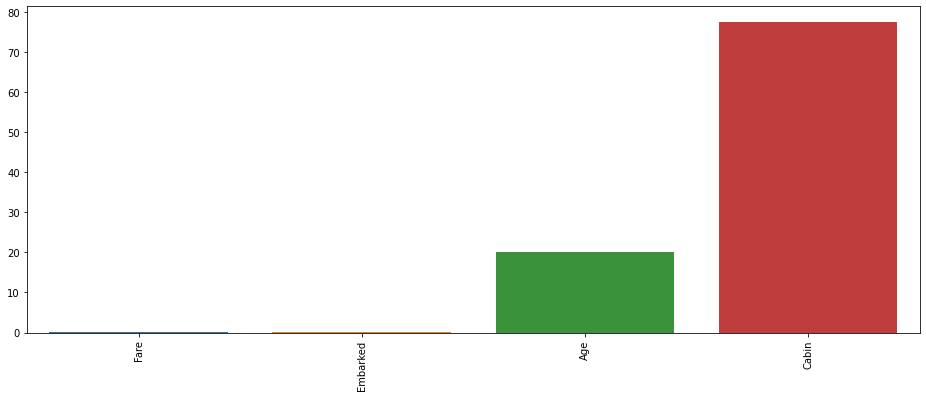

In [157]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [159]:
df4 = df.set_index('PassengerId')

In [160]:
df4.iloc[891:]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [161]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [169]:
df["Embarked"] = df["Embarked"].fillna('S')


In [170]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [171]:
df['Cabin'] = df['Cabin'].fillna('None')
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

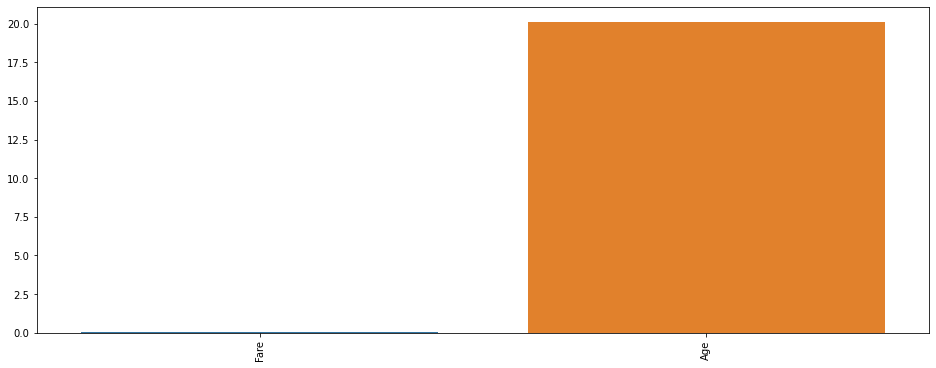

In [172]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [173]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [174]:
df['Fare'] = df["Fare"].fillna(13.6755)

In [175]:
df[df['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q,N,Mr
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,None,S,N,Mr
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,None,C,N,Mrs
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,None,C,N,Mr
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,None,Q,N,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,None,Q,N,Miss
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,None,Q,N,Miss
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,None,S,N,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,None,S,N,Mr


In [176]:
names = set(df['Second Name'])
age_nonnull = df[df['Age'].notnull()]
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [177]:
df = age_nonnull.drop_duplicates()
df = df.sort_index()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Cabin Class  1309 non-null   object 
 12  Second Name  1309 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 143.2+ KB


In [47]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

ValueError: min() arg is an empty sequence

<Figure size 1152x432 with 0 Axes>

In [143]:
df['Fare'] = df["Fare"].fillna(13.6755)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Cabin Class  1309 non-null   object 
 12  Second Name  1309 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 143.2+ KB


In [180]:
df['Family Members'] = df['SibSp']+df['Parch']

In [181]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S,N,Mr,1
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,None,Q,N,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,None,S,N,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,None,Q,N,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,None,S,N,Rev,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,Miss,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.774238,1,2,W./C. 6607,23.4500,None,S,N,Miss,3
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,Mr,0


In [182]:
df5 = df.set_index('PassengerId').sort_index()

In [147]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [332]:
test = df5.iloc[891:]

In [ ]:
train = 

In [333]:
train = df5.iloc[:891]

In [341]:
# test.to_csv("Test_final.csv", index = False)

In [190]:
# train.to_csv("Train_final.csv", index = False)

In [340]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,None,Q,N,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,None,S,N,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,None,Q,N,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,None,S,N,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,None,S,N,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,None,S,N,Mr,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C,Dona,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,None,S,N,Mr,0
416,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,None,S,N,Mr,0


In [337]:
test.set_index(np.arange(len(test)))

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,None,Q,N,Mr,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,None,S,N,Mrs,1
2,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,None,Q,N,Mr,0
3,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,None,S,N,Mr,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,None,S,N,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,None,S,N,Mr,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C,Dona,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,None,S,N,Mr,0
416,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,None,S,N,Mr,0


In [309]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S,N,Mr,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S,N,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S,N,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,None,S,N,Rev,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B,Miss,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.774238,1,2,W./C. 6607,23.4500,None,S,N,Miss,3
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C,Mr,0


In [202]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [339]:
test = test.reset_index()

In [207]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [308]:
train = train.reset_index()

In [232]:
df6

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [312]:
train = pd.concat([df6, train], axis = 1)

In [303]:
train.columns

Index(['index', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin Class', 'Second Name',
       'Family Members'],
      dtype='object')

In [310]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'Second Name'], axis = 1)

In [313]:
train

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Class,Family Members
0,0,1,3,male,22.000000,1,0,7.2500,S,N,1
1,1,2,1,female,38.000000,1,0,71.2833,C,C,1
2,1,3,3,female,26.000000,0,0,7.9250,S,N,0
3,1,4,1,female,35.000000,1,0,53.1000,S,C,1
4,0,5,3,male,35.000000,0,0,8.0500,S,N,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,male,27.000000,0,0,13.0000,S,N,0
887,1,888,1,female,19.000000,0,0,30.0000,S,B,0
888,0,889,3,female,21.774238,1,2,23.4500,S,N,3
889,1,890,1,male,26.000000,0,0,30.0000,C,C,0


In [315]:
X_str = train[['Sex', 'Embarked', 'Cabin Class']]
X_int = train.drop(['Sex', 'Embarked', 'Cabin Class'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df_combined = pd.concat([X_str_dummies,X_int], axis = 1)

In [316]:
train = df_combined

In [317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_male        891 non-null    uint8  
 1   Embarked_Q      891 non-null    uint8  
 2   Embarked_S      891 non-null    uint8  
 3   Cabin Class_B   891 non-null    uint8  
 4   Cabin Class_C   891 non-null    uint8  
 5   Cabin Class_D   891 non-null    uint8  
 6   Cabin Class_E   891 non-null    uint8  
 7   Cabin Class_F   891 non-null    uint8  
 8   Cabin Class_G   891 non-null    uint8  
 9   Cabin Class_N   891 non-null    uint8  
 10  Cabin Class_T   891 non-null    uint8  
 11  Survived        891 non-null    int64  
 12  PassengerId     891 non-null    int64  
 13  Pclass          891 non-null    int64  
 14  Age             891 non-null    float64
 15  SibSp           891 non-null    int64  
 16  Parch           891 non-null    int64  
 17  Fare            891 non-null    flo

In [318]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [320]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [321]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [322]:
X_train.shape

(623, 18)

In [323]:
X_test.shape

(268, 18)

In [324]:
penalty = ['l1']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0.8,1, 20)

In [325]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [326]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 6.30957344,  6.46437163,  6.62296762,  6.78545457,  6.95192796,
        7.12248558,  7.29722764,  7.4762568 ,  7.65967823,  7.8475997 ,
        8.04013161,  8.23738707,  8.43948197,  8.64653503,  8.8586679 ,
        9.07600522,  9.29867465,  9.52680703,  9.76053637, 10.        ]),
                         'penalty': ['l1']})

In [327]:
grid_model.best_params_

{'C': 6.309573444801933, 'penalty': 'l1'}

In [328]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [329]:
y_pred = grid_model.predict(X_test)

In [330]:
accuracy_score(y_test,y_pred)

0.7985074626865671

In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.82      0.74      0.78       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [292]:
test = test.reset_index()

In [293]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name,Family Members
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,None,Q,N,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,None,S,N,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,None,Q,N,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,None,S,N,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,None,S,N,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,None,S,N,Mr,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C,Dona,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,None,S,N,Mr,0
416,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,None,S,N,Mr,0


In [294]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [295]:
X_str = test[['Sex', 'Embarked', 'Cabin Class', 'Second Name']]
X_int = test.drop(['Sex', 'Embarked', 'Cabin Class', 'Second Name'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df_combined = pd.concat([X_str_dummies,X_int], axis = 1)

In [296]:
test = df_combined

In [297]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex_male            418 non-null    uint8  
 1   Embarked_Q          418 non-null    uint8  
 2   Embarked_S          418 non-null    uint8  
 3   Cabin Class_B       418 non-null    uint8  
 4   Cabin Class_C       418 non-null    uint8  
 5   Cabin Class_D       418 non-null    uint8  
 6   Cabin Class_E       418 non-null    uint8  
 7   Cabin Class_F       418 non-null    uint8  
 8   Cabin Class_G       418 non-null    uint8  
 9   Cabin Class_N       418 non-null    uint8  
 10  Second Name_Dona    418 non-null    uint8  
 11  Second Name_Dr      418 non-null    uint8  
 12  Second Name_Master  418 non-null    uint8  
 13  Second Name_Miss    418 non-null    uint8  
 14  Second Name_Mr      418 non-null    uint8  
 15  Second Name_Mrs     418 non-null    uint8  
 16  Second N